# Data Cleaning Project: Cafe Sales Dataset

## Introduction
This project focuses on cleaning and preprocessing the "dirty_cafe_sales.csv" dataset, which contains transaction records from a cafe. 

The dataset includes the following columns:
- Transaction ID
- Item
- Quantity
- Price Per Unit
- Total Spent
- Payment Method
- Location
- Transaction Date

The objectives are:
1. Correct inconsistent and erroneous data (e.g., "ERROR", "UNKNOWN").
2. Handle missing or null values.
3. Ensure proper data types for analysis.
4. Remove duplicates and standardize text.
5. Prepare a clean dataset ready for further analysis.


In [292]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cafe-sales-data/dirty_cafe_sales.csv


In [293]:
import os

os.listdir("/kaggle/input/cafe-sales-data")


['dirty_cafe_sales.csv']

# 2. Load Dataset

In [294]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/cafe-sales-data/dirty_cafe_sales.csv")

# Preview the first few rows
data.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


# 3. Initial Exploration

In [295]:
# Check dataset structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [296]:
# Summary statistics
data.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [297]:

# Check missing values
data.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [298]:

# Check duplicates
data.duplicated().sum()


0

In [299]:
# Check Data Size
data.size

80000

# 4. Data Cleaning

In [300]:
# a) Standardize Column Names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [301]:
data.columns

Index(['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent',
       'payment_method', 'location', 'transaction_date'],
      dtype='object')

In [302]:
# b) Handle Erroneous/Placeholder Values
data.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [303]:
# inspect the item column
data["item"].value_counts()

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [304]:
# Replace the "ERROR" in the item column with "unknown"
data["item"] = data["item"].str.replace("ERROR", "UNKNOWN")

data["item"].value_counts()

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      636
Name: count, dtype: int64

In [305]:
# c) Convert Data Types
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')
data['price_per_unit'] = pd.to_numeric(data['price_per_unit'], errors='coerce')
data['total_spent'] = pd.to_numeric(data['total_spent'], errors='coerce')
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')


In [306]:
# d) Handle Missing Values
# Fill missing total_spent from quantity * price_per_unit
data['total_spent'] = data['total_spent'].fillna(data['quantity'] * data['price_per_unit'])

# Fill categorical missing values with 'Unknown'
data['payment_method'] = data['payment_method'].fillna('Unknown')
data['location'] = data['location'].fillna('Unknown')

In [307]:
# e) Remove Duplicates
data = data.drop_duplicates()

# f) Standardize Text Columns

In [308]:

for col in ['item', 'payment_method', 'location']:
    data[col] = data[col].str.strip().str.title()

# 5. Verify Cleaning

In [309]:

data.info()
data.head()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    10000 non-null  object        
 1   item              9667 non-null   object        
 2   quantity          9521 non-null   float64       
 3   price_per_unit    9467 non-null   float64       
 4   total_spent       9960 non-null   float64       
 5   payment_method    10000 non-null  object        
 6   location          10000 non-null  object        
 7   transaction_date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


transaction_id        0
item                333
quantity            479
price_per_unit      533
total_spent          40
payment_method        0
location              0
transaction_date    460
dtype: int64

# 6. Exploratory Data Analysis (EDA)

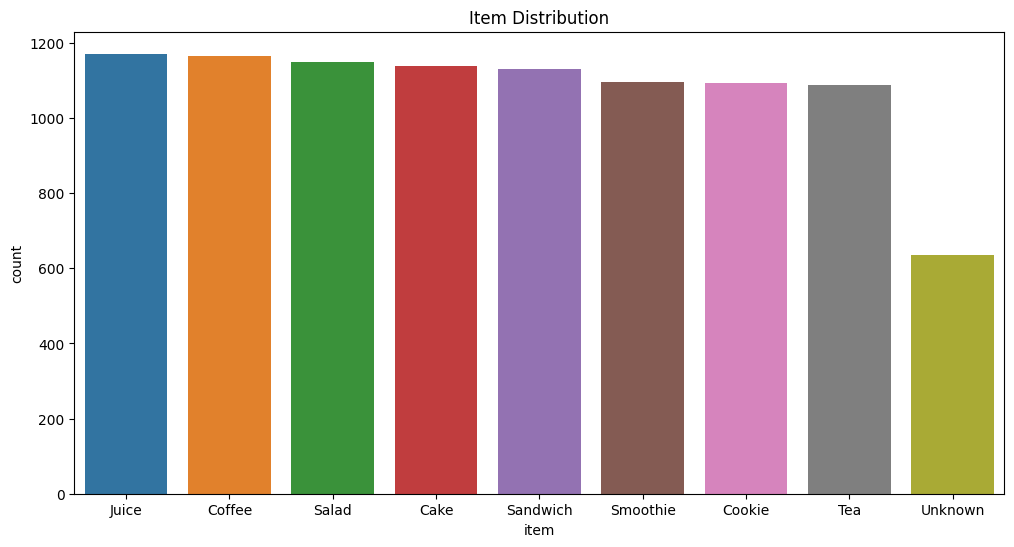

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of items sold
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='item', order=data['item'].value_counts().index)
plt.title('Item Distribution')
plt.show()




# Total spent by payment method
plt.figure(figsize=(12,6))
sns.barplot(data=data.groupby('payment_method')['total_spent'].sum().reset_index(), x='payment_method', y='total_spent')
plt.title('Total Spent by Payment Method')
plt.show()

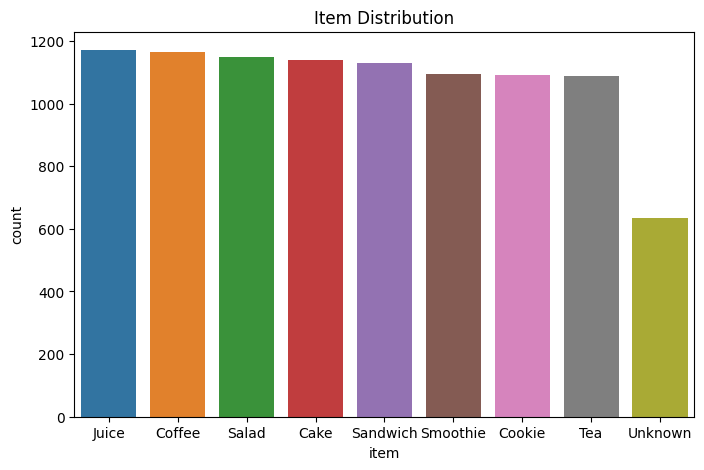

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of items sold
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='item', order=data['item'].value_counts().index)
plt.title('Item Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


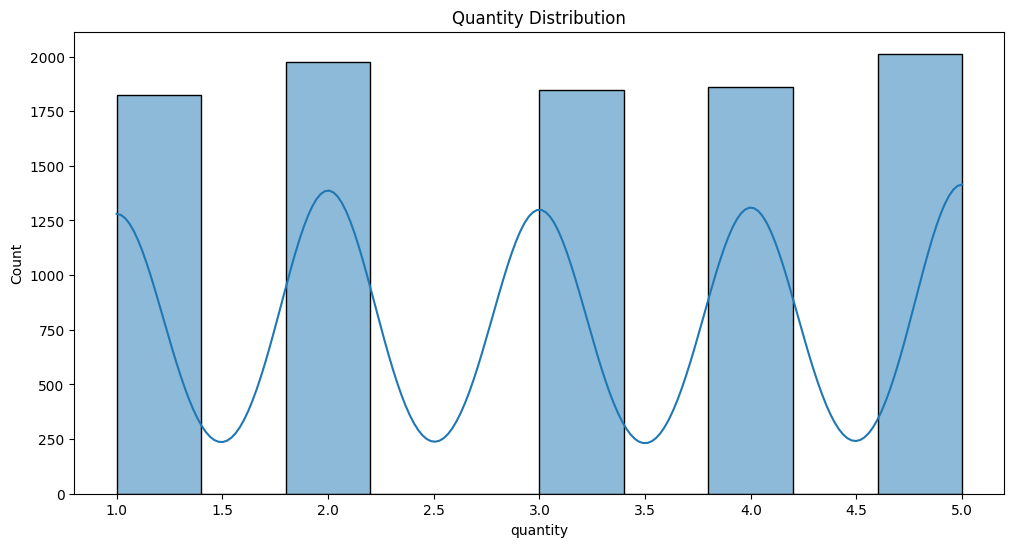

In [312]:

# Quantity distribution
plt.figure(figsize=(12,6))
sns.histplot(data['quantity'], bins=10, kde=True)
plt.title('Quantity Distribution')
plt.show()


In [313]:
# Check correlation
correlation = data.corr(numeric_only = True)

Text(0.5, 1.0, 'Correlation Heatmap')

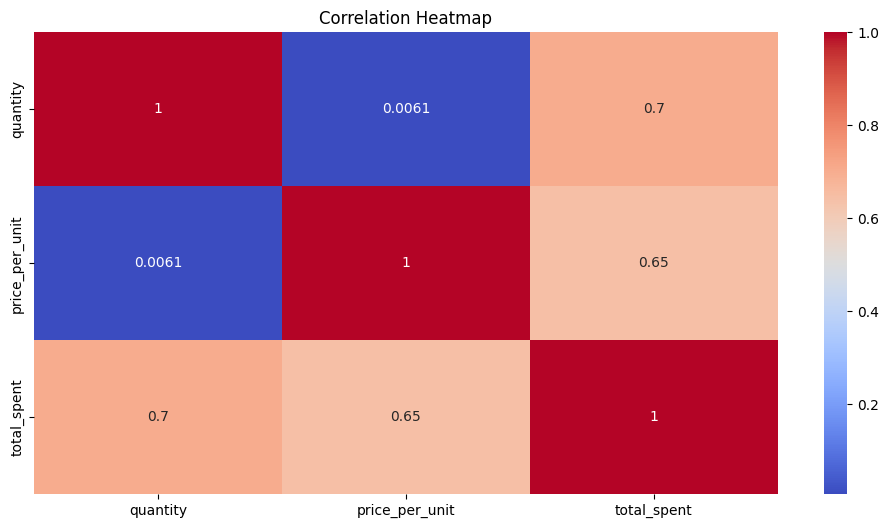

In [314]:
plt.figure(figsize = (12,6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')

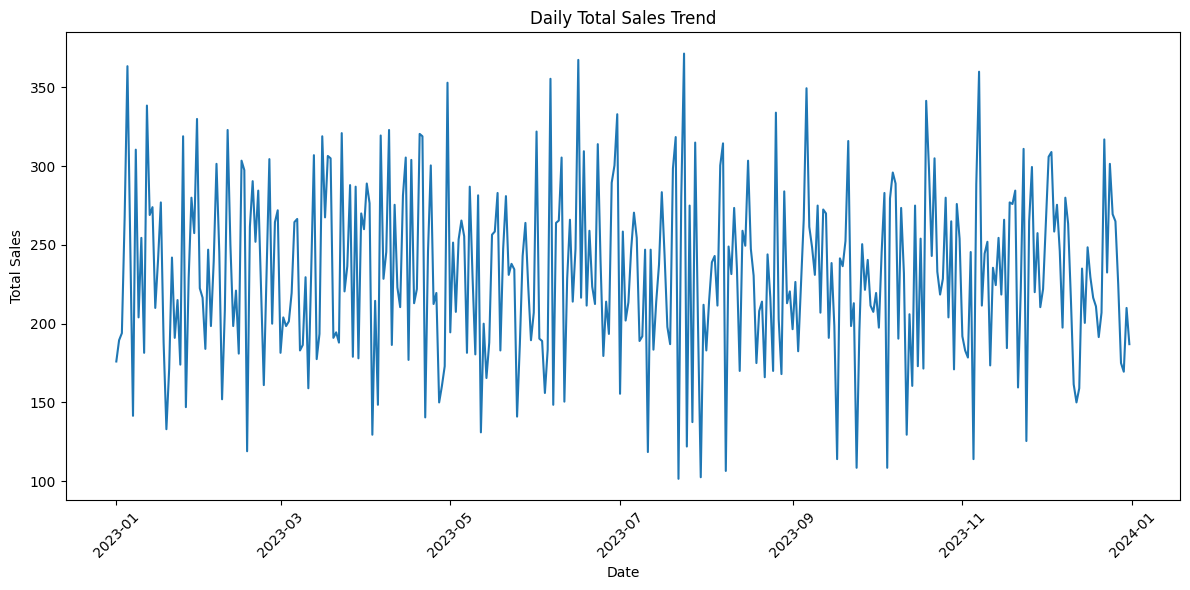

In [315]:
import matplotlib.pyplot as plt

# Ensure date column is datetime
data["transaction_date"] = pd.to_datetime(data["transaction_date"])

# Group by date for trendline
daily_sales = data.groupby("transaction_date")["total_spent"].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


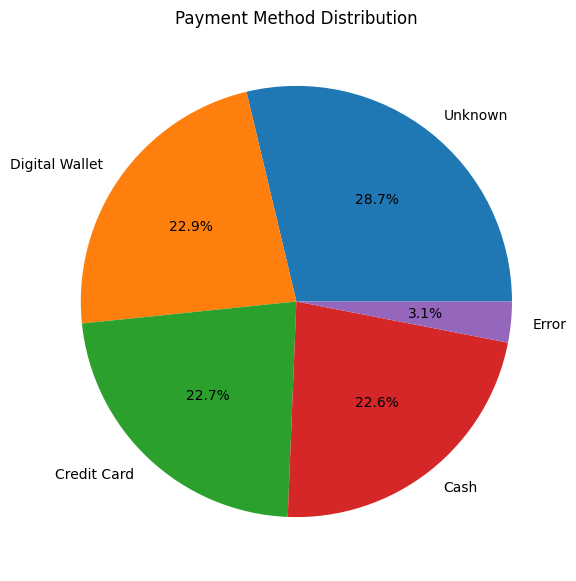

In [316]:
payment_counts = data["payment_method"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%")
plt.title("Payment Method Distribution")
plt.show()


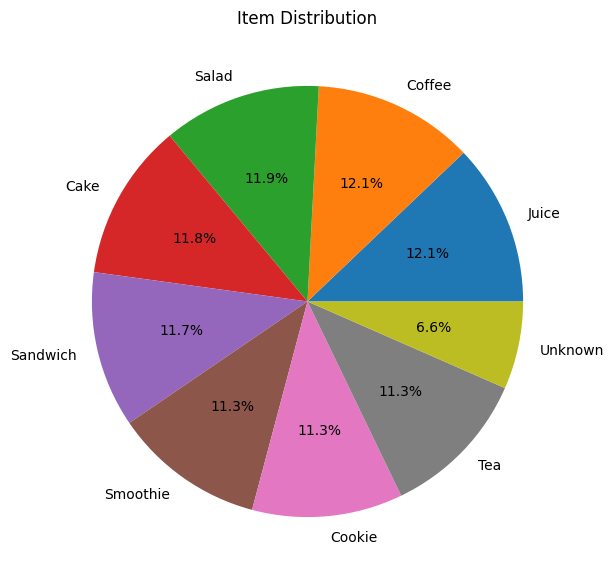

In [317]:
item_counts = data["item"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(item_counts, labels=item_counts.index, autopct="%1.1f%%")
plt.title("Item Distribution")
plt.show()


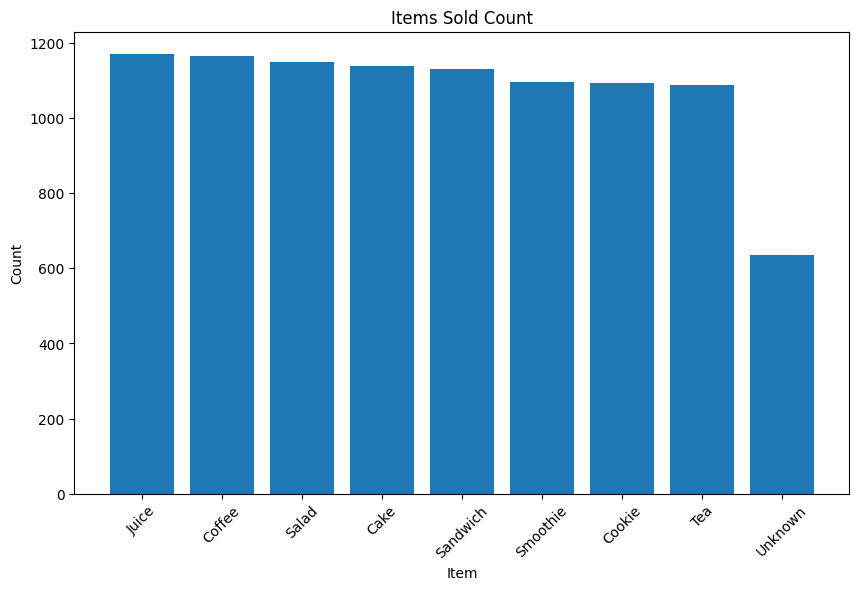

In [318]:
item_counts = data["item"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(item_counts.index, item_counts.values)
plt.title("Items Sold Count")
plt.xlabel("Item")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [319]:
# Correlation
correlation = data.corr(numeric_only = True)

In [320]:
correlation

,quantity,price_per_unit,total_spent
quantity,1.000000,0.006078,0.704010
price_per_unit,0.006078,1.000000,0.646389
total_spent,0.704010,0.646389,1.000000


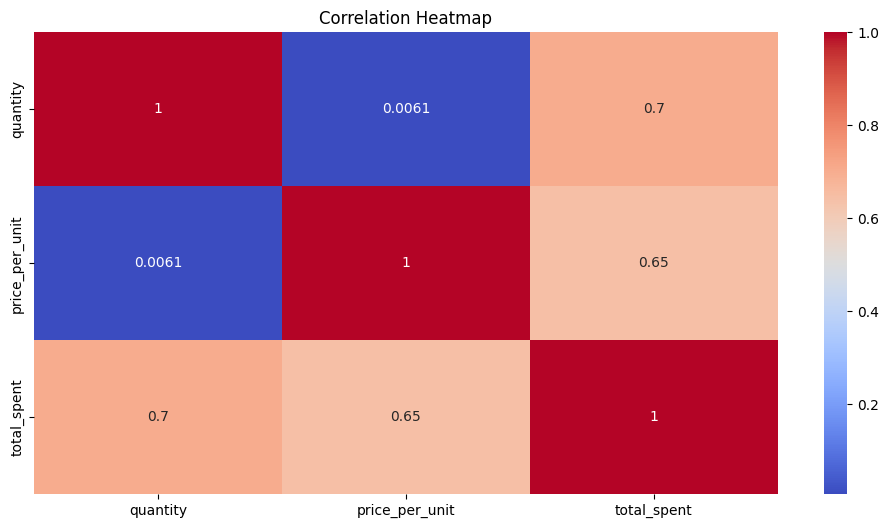

In [321]:
plt.figure(figsize =(12,6))
sns.heatmap(correlation, annot= True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()